In [1]:
import os
from ultralytics import YOLO
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key="nMDpz8USKh6C3rYLlEVe")
project = rf.workspace("rahmatsyarifazhari").project("tarkam-football-analytics-8fzhs")
version = project.version(1)
dataset = version.download("yolov11")

In [ ]:
rf = Roboflow(api_key="nMDpz8USKh6C3rYLlEVe")
project = rf.workspace("rahmatsyarifazhari").project("tarkam-football-analytics-8fzhs")
version = project.version(2)
dataset = version.download("yolov11")

In [ ]:
rf = Roboflow(api_key="nMDpz8USKh6C3rYLlEVe")
project = rf.workspace("rahmatsyarifazhari").project("tarkam-football-analytics-8fzhs")
version = project.version(4)
dataset = version.download("yolov11")

## Object Detection

In [3]:
models = ['yolo11n.pt', 'yolo11s.pt', 'yolo11m.pt']
sizes = ['nano', 'small', 'medium']
epochs = 200
batch = -1
data_path = "Tarkam-Football-Analytics-2Class/data.yaml"
project_base = "results2"

for model_name, size in zip(models, sizes):
    print(f"Training {size} model...")
    model = YOLO(model_name)

    training = model.train(
        data=data_path, 
        epochs=epochs, 
        imgsz=640, 
        batch=batch, 
        project=f"{project_base}/training", 
        name=f"{size}-training",
        exist_ok=True
    )

    csv_filename = f"{project_base}/training/summary/{size}-training-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(training.to_csv())

    validation = model.val(
        data=data_path, 
        imgsz=640,
        project=f"{project_base}/validation",
        name=f"{size}-validation",
        exist_ok=True,
        split="test"
    )

    csv_filename = f"{project_base}/validation/summary/{size}-validation-metrics.csv"
    os.makedirs(os.path.dirname(csv_filename), exist_ok=True)
    with open(csv_filename, "w") as f:
        f.write(validation.to_csv())

    print(f"Finished training and validating {size} model.")

Training nano model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Tarkam-Football-Analytics-2Class/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nano-training, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pati

train: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/train/label

train: New cache created: /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/train/labels.cache


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 5.75G reserved, 0.36G allocated, 5.89G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2590230       6.442         1.059         37.24         24.04        (1, 3, 640, 640)                    list
     2590230       12.88         1.208         27.34         25.37        (2, 3, 640, 640)                    list
     2590230       25.77         1.520         62.88          31.6        (4, 3, 640, 640)                    list
     2590230       51.53         2.166         53.16         64.15        (8, 3, 640, 640)                    list
     2590230       103.1         3.368         56.29         85.23       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 20 for CUDA:0 10.10G/12.00G (84%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 141.

train: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/train/label


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 104.8±55.1 MB/s, size: 44.8 KB)


val: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/valid/labels.

val: New cache created: /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/valid/labels.cache


Plotting labels to results2/training/nano-training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results2/training/nano-training
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      3.23G      1.604      3.562      1.012        318        640: 100%|██████████| 8/8 [00:02<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428     0.0116      0.175      0.113     0.0387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.39G       1.52      2.662      0.942        348        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428     0.0105      0.156     0.0832      0.026

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      3/200       3.4G      1.534      1.507     0.9313        501        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428    0.00841      0.135     0.0657     0.0141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.43G      1.542      1.202     0.9232        393        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428     0.0122      0.165     0.0903     0.0208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.59G      1.493       1.09     0.9255        361        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428     0.0134       0.17     0.0722     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200       3.6G      1.481      1.026     0.9344        403        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428     0.0176      0.224     0.0751     0.0264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      7/200      3.62G      1.457      1.016     0.9388        303        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.023      0.296      0.163     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.63G        1.4     0.9601     0.9286        381        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428     0.0282      0.379      0.294      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.65G      1.404     0.9388     0.9189        305        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.921      0.363      0.418      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.66G      1.468      0.931     0.9115        397        640: 100%|██████████| 8/8 [00:08<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.932      0.197      0.366      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.68G      1.521     0.9425     0.9156        411        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.965      0.302      0.446       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.69G      1.494     0.9423     0.9312        396        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.973      0.373      0.462      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.71G      1.399     0.8967     0.9138        437        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.96      0.425      0.465      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.87G      1.352      0.876     0.9156        337        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.972      0.455      0.477       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.89G      1.357     0.8712     0.9093        423        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.977       0.47       0.48      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     16/200       3.9G      1.355     0.8652     0.9017        437        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.956      0.464      0.474      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      4.07G      1.292     0.8252     0.8908        404        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.965      0.456      0.476      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      4.09G      1.289     0.8184     0.8973        348        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.972      0.473      0.474      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       4.1G      1.277     0.7859     0.8926        395        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.967      0.464       0.48      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      4.12G      1.309     0.8378     0.8927        353        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.958      0.459      0.475      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      4.13G      1.308     0.8217     0.9073        308        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.972      0.465      0.476      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      4.14G      1.257     0.7892     0.8987        349        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.967      0.471      0.478      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      4.16G      1.199     0.7669     0.8907        366        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.969      0.478      0.481      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      4.18G      1.169     0.7372     0.8883        421        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0

WARNING ⚠️ NMS time limit 3.500s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.971      0.405      0.414       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      4.19G      1.185     0.7259     0.8851        353        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.97      0.474      0.482      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      4.21G      1.205     0.7283     0.8812        375        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.976      0.466      0.482      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      4.22G      1.172     0.7089     0.8788        319        640: 100%|██████████| 8/8 [00:08<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.972      0.479      0.482      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      4.23G      1.184     0.7238     0.8769        412        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.976      0.471      0.483      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      4.25G      1.193     0.7148     0.8849        339        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.969      0.476      0.542      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     30/200      4.26G      1.189     0.7052     0.8792        257        640: 100%|██████████| 8/8 [00:08<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.974      0.477      0.614      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      4.28G      1.211     0.6984     0.8804        327        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.974      0.474      0.623      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      4.29G      1.131     0.6911     0.8814        409        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.975      0.484      0.563      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      4.31G       1.14      0.686     0.8759        502        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.978      0.466      0.618      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      4.32G       1.12     0.6711     0.8667        452        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.909       0.52      0.672      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.34G      1.112     0.6599     0.8647        411        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.686      0.518      0.639      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      4.35G      1.097     0.6587     0.8677        406        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.814      0.544       0.62      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      4.37G       1.15     0.6918     0.8714        398        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.716      0.557      0.617      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      4.38G      1.112     0.6735     0.8623        307        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.648      0.562      0.575      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     39/200       4.4G      1.113     0.6755     0.8726        388        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.691      0.581      0.645      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      4.41G      1.117     0.6657      0.862        441        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.755      0.574      0.588      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      4.43G      1.134     0.6653     0.8689        432        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.759      0.609      0.681      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      4.44G      1.104     0.6615     0.8712        348        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.775      0.672      0.692      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      4.46G      1.138     0.6773     0.8763        466        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.786       0.71      0.704      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      4.47G      1.101      0.641     0.8652        424        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.717       0.72      0.665      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      4.49G      1.084     0.6493     0.8608        301        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.805      0.673       0.66       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200       4.5G      1.044     0.6237     0.8625        279        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.687      0.618      0.592      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      4.52G      1.068     0.6251     0.8566        411        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.698      0.655      0.639      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      4.53G       1.04     0.6362     0.8554        330        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.741        0.6      0.637      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      4.54G      1.052     0.6292     0.8631        355        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.859      0.637      0.698      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      4.56G      1.034     0.6257     0.8528        339        640: 100%|██████████| 8/8 [00:08<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.911       0.63       0.68      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      4.58G      1.058      0.607     0.8624        416        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.956      0.637      0.681      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      4.59G      1.014     0.5927     0.8496        386        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.956      0.637       0.69      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      4.61G      1.009     0.5839     0.8471        346        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.894      0.651      0.692      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      4.62G      1.023      0.601     0.8621        333        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.894      0.637      0.683       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      4.63G      1.052     0.6156     0.8589        316        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428        0.7      0.692      0.691      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      4.65G      1.044     0.6081     0.8594        377        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.845      0.654       0.66      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      4.67G      1.027     0.6103     0.8473        324        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.861      0.692      0.723      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      4.68G       1.03     0.5993     0.8543        301        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.861      0.725      0.733       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      4.69G      1.008     0.5939     0.8577        427        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.845      0.734      0.745       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      4.71G      1.033     0.5963     0.8539        456        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.889      0.689      0.707      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      4.72G       1.02     0.5823     0.8516        450        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.902      0.707       0.73       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      4.89G      1.022     0.5911     0.8528        356        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.933      0.726      0.753      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      4.91G      1.008     0.5631      0.847        415        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.922      0.725      0.776      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      4.92G     0.9815     0.5615     0.8497        326        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.828      0.764      0.774      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      4.94G      1.015     0.5652     0.8523        405        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.94      0.689      0.752      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      4.95G      1.052     0.5708     0.8577        311        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.93      0.746      0.762      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      4.97G      1.022     0.5641     0.8487        348        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.926      0.725      0.743       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     68/200      4.98G      1.052     0.5668     0.8551        368        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.797      0.674      0.675      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200         5G       1.03     0.5654     0.8535        335        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.957      0.709      0.799      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.01G      1.001     0.5663     0.8432        422        640: 100%|██████████| 8/8 [00:08<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.831      0.675       0.73      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      5.03G      1.001     0.5631     0.8562        316        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.978       0.69      0.739      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      5.04G     0.9765     0.5499      0.844        417        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.917      0.711      0.762      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      5.06G      1.019     0.5806     0.8424        374        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.885      0.687      0.708      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      5.07G     0.9818     0.5537     0.8465        372        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.929      0.692      0.716      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      5.09G      1.003     0.5684     0.8426        394        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.871      0.692      0.723      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200       5.1G     0.9764     0.5638     0.8509        408        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.911      0.692      0.724      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      5.12G     0.9763     0.5446     0.8439        400        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.889      0.711      0.739      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      5.13G     0.9497     0.5519      0.849        359        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.942      0.711      0.759      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      5.15G     0.9579     0.5473     0.8442        491        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.904      0.689      0.748      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      5.16G     0.9748     0.5434     0.8495        411        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.91      0.692      0.736      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.18G     0.9823     0.5582       0.84        384        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.967      0.723      0.765      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      5.19G     0.9466     0.5416     0.8381        269        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.973       0.72      0.772      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      5.21G     0.9208     0.5354     0.8405        368        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.897       0.73      0.755      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      5.22G      0.925     0.5324     0.8395        410        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.895       0.68      0.732      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      5.23G     0.9284     0.5329     0.8384        360        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.951      0.698      0.752      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      5.25G     0.9412     0.5392      0.841        310        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.838      0.719      0.731      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      5.26G     0.9714     0.5432     0.8483        374        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.858       0.72      0.714      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      5.28G     0.9899     0.5468     0.8511        312        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.846       0.73      0.737      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      5.29G      0.966     0.5428     0.8404        339        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.86       0.73      0.737      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      5.31G     0.9586     0.5292     0.8391        380        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.849       0.73      0.769      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      5.32G      0.903     0.5302     0.8434        402        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.912      0.779      0.811      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      5.34G     0.9245     0.5447     0.8427        294        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.896      0.776      0.771      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      5.35G     0.9268     0.5344     0.8371        353        640: 100%|██████████| 8/8 [00:08<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.937      0.781       0.81      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      5.37G     0.8902     0.5095     0.8354        401        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.87      0.748      0.773      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      5.38G     0.9034     0.5102     0.8361        417        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.912      0.748      0.775      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200       5.4G     0.9225     0.5206     0.8382        525        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.963      0.767      0.806      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      5.41G      0.953     0.5183     0.8383        406        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.931       0.76      0.775      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      5.43G     0.9132     0.5106     0.8377        476        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.932      0.785      0.798      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      5.44G     0.9073      0.524     0.8393        372        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.895      0.772      0.779      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      5.46G     0.8637      0.512     0.8297        402        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.915      0.748      0.774      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      5.47G     0.8737     0.5055     0.8395        406        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.926      0.748      0.775      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      5.49G     0.8821     0.5089     0.8321        460        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.927      0.722        0.8      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200       5.5G     0.8688     0.4942     0.8343        427        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.926      0.729      0.799      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      5.52G     0.9093     0.5256     0.8338        386        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.902      0.748      0.771      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      5.53G     0.9267     0.5068     0.8398        456        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.918      0.765      0.801      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      5.55G     0.9165     0.5305     0.8351        375        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.876      0.747       0.76      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      5.56G     0.9142     0.5295     0.8379        369        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.902      0.765      0.802      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      5.58G       0.88     0.5118     0.8326        365        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.959      0.748      0.784      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      5.59G     0.8921     0.5104     0.8331        426        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.912      0.729      0.768      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      5.61G     0.8519     0.4927     0.8338        248        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.942      0.776      0.805       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      5.78G     0.8961     0.5112     0.8336        427        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.905      0.764      0.769      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      5.79G     0.8554     0.4936     0.8326        370        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.934      0.784      0.803      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      5.81G     0.8642     0.5001     0.8295        383        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.896      0.765      0.787      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      5.82G      0.832     0.4756     0.8235        498        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.896      0.774      0.783      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      5.84G     0.8656     0.4995     0.8257        330        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.915      0.804      0.816      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      5.85G     0.8619     0.4911     0.8326        452        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.924       0.76      0.771      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      5.87G     0.8474     0.4918     0.8314        456        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.919      0.729      0.762      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      5.88G     0.8894      0.491     0.8315        426        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.946      0.767      0.797      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200       5.9G     0.8524     0.4895     0.8317        349        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.913      0.748      0.763      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      5.91G     0.8279     0.4672     0.8283        349        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.917      0.747      0.768      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      5.93G     0.8043     0.4638     0.8303        329        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.869      0.747      0.771      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      5.94G      0.818     0.4637     0.8246        280        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.906       0.76      0.786        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      5.96G     0.8373     0.4728     0.8297        329        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.893      0.747      0.763      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      5.97G     0.8525      0.477       0.83        387        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.897      0.747      0.763      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      5.98G     0.8612     0.4808     0.8286        369        640: 100%|██████████| 8/8 [00:08<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.935      0.765      0.796      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200         6G     0.8278     0.4698     0.8258        511        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.886      0.747      0.768      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.62G     0.8358     0.4828     0.8285        358        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.87      0.747       0.76      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      3.62G      0.806     0.4625     0.8271        400        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.918      0.669      0.721      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.76G     0.8104     0.4663     0.8247        457        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.931      0.691      0.736      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      3.76G      0.812     0.4648     0.8295        356        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.933       0.69      0.759       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      3.76G     0.8137     0.4637     0.8244        512        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.786      0.774      0.774      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      3.76G     0.8217     0.4703     0.8271        418        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.874      0.775      0.779      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      3.76G     0.8157     0.4639     0.8293        298        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.855      0.759      0.761      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      3.76G     0.8262     0.4617     0.8263        380        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.907      0.785      0.811       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      3.76G     0.8041     0.4548     0.8247        366        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.878      0.773      0.798      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      3.76G     0.8255     0.4695     0.8331        384        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.886      0.785      0.795      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      3.92G     0.8479     0.4842      0.829        489        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.868      0.745      0.768      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      3.92G     0.7995     0.4766     0.8192        378        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.974      0.727      0.794      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      3.92G     0.8071     0.4895     0.8229        326        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.939      0.708      0.753      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      3.92G     0.8187     0.4661     0.8234        378        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.92       0.71      0.753       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      3.92G     0.7754     0.4486     0.8312        303        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.862      0.748      0.756      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      3.92G       0.81     0.4628     0.8248        385        640: 100%|██████████| 8/8 [00:08<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.862      0.747      0.759      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      3.94G     0.8054     0.4574     0.8274        372        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.873      0.747      0.762       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      3.96G     0.8293     0.4711     0.8286        293        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.895      0.764      0.786      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      3.97G     0.8279     0.4624     0.8277        424        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.851      0.748      0.764      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      3.98G     0.7833     0.4547     0.8262        338        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.906      0.726      0.772      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200         4G     0.7964     0.4506     0.8222        374        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.838      0.748      0.771        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      4.01G     0.8059     0.4534       0.82        420        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.837      0.748      0.773      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      4.03G     0.7889     0.4515     0.8201        402        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.791      0.708      0.724      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      4.04G     0.7752     0.4382      0.819        406        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.823      0.721      0.752      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      4.06G     0.7803     0.4491     0.8227        395        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.97      0.691      0.754      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      4.07G     0.7749     0.4531     0.8179        335        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.891      0.747      0.772      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      4.09G     0.7755     0.4396     0.8155        357        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.98      0.745      0.799      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200       4.1G      0.772     0.4332     0.8119        341        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.918      0.765      0.794      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      4.12G     0.7527     0.4306     0.8173        354        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.936      0.765      0.813      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      4.13G     0.7695     0.4463     0.8239        361        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.944      0.745      0.785      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      4.15G     0.7867     0.4567     0.8198        446        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.927      0.728      0.788      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      4.16G     0.7837     0.4391     0.8236        369        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.914      0.728       0.81      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      4.18G     0.7901      0.444     0.8183        401        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.967      0.762      0.808      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      4.19G     0.7951     0.4628     0.8204        438        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.926       0.73      0.773      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      4.21G     0.7901     0.4581     0.8206        345        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.935      0.743      0.786      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      4.22G     0.7666     0.4377     0.8199        378        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.938      0.745      0.789      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      4.24G     0.7527     0.4364     0.8192        439        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.92      0.747      0.777      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      4.25G     0.7716     0.4579     0.8213        355        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.869      0.747      0.772      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      4.27G     0.7711     0.4432     0.8254        453        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.834      0.767      0.784      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      4.28G     0.7608     0.4443     0.8239        361        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.827      0.767      0.773       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      4.29G     0.7633     0.4448     0.8225        324        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.854      0.785        0.8      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      4.31G     0.7755     0.4402      0.815        361        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.914      0.747      0.773      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      4.32G     0.7451     0.4576     0.8224        360        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.837      0.748      0.755      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      4.34G       0.76     0.4408     0.8108        407        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.887      0.766      0.785      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      4.35G     0.7398     0.4319     0.8159        406        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.891      0.745      0.766      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      4.37G     0.7344     0.4194     0.8191        323        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.889      0.745      0.769      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      4.38G     0.7388     0.4405     0.8207        249        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.874      0.728      0.764      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200       4.4G     0.7436     0.4272     0.8177        332        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.884      0.728      0.771      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      4.41G     0.7281      0.432     0.8157        371        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.937      0.747        0.8      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      4.43G     0.7377     0.4211      0.816        434        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.905      0.728      0.777      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      4.44G     0.7221     0.4159     0.8158        365        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.919       0.73      0.782       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      4.46G     0.7368     0.4182     0.8159        464        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.913       0.73      0.781       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      4.47G     0.7451     0.4264     0.8203        378        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.907      0.742      0.782      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      4.49G     0.7312     0.4258     0.8128        283        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.91      0.748      0.775      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200       4.5G      0.734     0.4213     0.8171        406        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.91      0.747      0.773       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      4.52G     0.7379     0.4201     0.8129        446        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.904      0.747      0.779      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      4.53G     0.7319     0.4191     0.8148        319        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.885      0.747      0.777      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      4.55G     0.7414     0.4263     0.8113        482        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.881      0.747      0.774      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      4.56G     0.7132     0.4207     0.8154        318        640: 100%|██████████| 8/8 [00:08<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.881      0.747      0.779      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      4.58G     0.7436     0.4263     0.8151        449        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.872      0.748      0.777      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      4.59G     0.7285      0.439     0.8137        426        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.856      0.748       0.78      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      4.61G     0.7412     0.4183      0.817        372        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.857      0.748       0.78      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      4.62G     0.7226     0.4231     0.8145        481        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.845      0.748      0.775      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      4.64G     0.7245     0.4178     0.8105        279        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.868      0.748      0.778      0.526


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      4.65G     0.6723     0.4144     0.8105        274        640: 100%|██████████| 8/8 [-1:59:5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.861      0.748      0.778      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      4.66G      0.664     0.4007     0.8105        260        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.849      0.748      0.774      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      4.68G     0.6683      0.405     0.8083        281        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.838      0.748      0.772      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       4.7G     0.6661     0.4008     0.8072        271        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.845      0.748      0.771      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      4.71G     0.6644     0.4011     0.8113        270        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.845      0.748      0.771       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      4.72G     0.6471        0.4      0.808        282        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.846      0.748      0.771      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      4.74G     0.6401      0.398     0.8087        257        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.872      0.766      0.794       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      4.75G     0.6644     0.3993     0.8088        265        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.876      0.766      0.796      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      4.77G     0.6549     0.3983     0.8111        251        640: 100%|██████████| 8/8 [00:00<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.857      0.766      0.791      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      4.78G     0.6459     0.3932     0.8049        270        640: 100%|██████████| 8/8 [00:01<0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.874      0.767      0.796      0.528



200 epochs completed in 0.098 hours.
Optimizer stripped from results2/training/nano-training/weights/last.pt, 5.5MB
Optimizer stripped from results2/training/nano-training/weights/best.pt, 5.5MB

Validating results2/training/nano-training/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.907      0.742      0.781      0.542
                  ball         27         27      0.872      0.506      0.588      0.299
                player         30        401      0.943      0.978      0.975      0.785
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results2/training/nano-training
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 117.7±11.1 MB/s, size: 49.8 KB)


val: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/test/labels..

val: New cache created: /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         10        143      0.983      0.716      0.745      0.484
                  ball          9          9      0.981      0.444      0.496       0.14
                player         10        134      0.985      0.988      0.995      0.828
Speed: 0.3ms preprocess, 19.4ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to results2/validation/nano-validation
Finished training and validating nano model.
Training small model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Tarkam-Football-Analytics-2Class/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.

train: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/train/label

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 0.97G reserved, 0.45G allocated, 10.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     9428566       21.55         1.445         28.05         26.23        (1, 3, 640, 640)                    list
     9428566        43.1         1.799         41.07         45.31        (2, 3, 640, 640)                    list
     9428566        86.2         2.305         43.41          6783        (4, 3, 640, 640)                    list
     9428566       172.4         3.456         -7173         72.03        (8, 3, 640, 640)                    list
     9428566       344.8         5.526         101.4           126       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 17 for CUDA:0 7.25G/12.00G (60%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1456.9±474.8 MB/s, size: 42.3 KB)


train: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/train/label


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 502.3±99.2 MB/s, size: 44.8 KB)


val: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/valid/labels.


Plotting labels to results2/training/small-training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00053125), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results2/training/small-training
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.58G      1.547       3.11      1.009        137        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.926      0.443      0.451      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      4.88G       1.39      1.054     0.9181        139        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.949      0.444      0.455      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.92G      1.384     0.9165     0.9162        132        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.95      0.449      0.461      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      4.96G      1.381     0.8479     0.9215        178        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.967      0.459      0.477      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200         5G      1.391     0.8185     0.9151        157        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.625      0.518      0.478      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      5.05G      1.369       0.78     0.9183        120        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.886      0.692      0.734      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      5.09G      1.288      0.722     0.8994        140        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.62      0.642      0.645      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      5.09G      1.322     0.7309     0.9113        170        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.849      0.617      0.642      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.09G      1.269     0.7952      0.904         89        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.76      0.652      0.651      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      5.09G      1.243     0.7423     0.8913        111        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.968      0.633      0.681      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      5.09G      1.232     0.6777     0.8844        145        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.885      0.619      0.631      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      5.09G      1.224     0.6616     0.8934        147        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.905      0.637      0.673      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      5.09G       1.18     0.6354     0.8862        118        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.853       0.74      0.755        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.12G      1.212     0.6358     0.8882        111        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.858      0.718      0.734      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      5.17G      1.203     0.6666     0.8883        124        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.728      0.695      0.745      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      5.17G      1.213     0.6596     0.8855        143        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.873       0.71      0.754      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.17G      1.196     0.6398     0.8731        112        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.93      0.679      0.722      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.17G      1.224      0.645     0.8859        133        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.828      0.685      0.749      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      5.17G      1.222     0.6316     0.8741        135        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.965       0.67      0.747      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      5.17G      1.169     0.6155     0.8749        129        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.767      0.648      0.645       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.17G      1.174     0.6097     0.8837         67        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.855      0.703      0.747      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      5.17G      1.146     0.6081     0.8823        114        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.891      0.711       0.74      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.17G      1.141      0.603     0.8736        144        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.822      0.748      0.762      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200       5.2G      1.129     0.5826     0.8614        122        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.835      0.711      0.725      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200       5.2G      1.143     0.5876     0.8813         72        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.85      0.748      0.741      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200       5.2G      1.159     0.5755     0.8871        116        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.904      0.794      0.796      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200       5.2G      1.063     0.5705     0.8706         96        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.873      0.755      0.769      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200       5.2G      1.079     0.5584     0.8654        117        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.803      0.776       0.79      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200       5.2G      1.084     0.5674     0.8638         97        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.955      0.726      0.761      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200       5.2G      1.132     0.5743     0.8645        168        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.861      0.686      0.725      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200       5.2G      1.078     0.5654     0.8598        233        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.936      0.715      0.777       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200       5.2G      1.019      0.549     0.8615        106        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.957      0.724      0.798       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      5.21G      1.006     0.5484     0.8563        135        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.984      0.725      0.793      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      5.21G      1.026     0.5352     0.8588        121        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.959       0.73      0.794       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      5.21G      1.056     0.5478     0.8608         81        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.856      0.749      0.797      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      5.21G       1.04     0.5381     0.8556        156        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.903      0.777      0.787      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      5.21G     0.9781     0.5129     0.8493        111        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.912      0.762      0.785      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      5.21G      1.007     0.5194      0.853        143        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.936      0.767      0.798      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      5.21G      1.001      0.523     0.8545        151        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.862      0.723      0.756      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.21G     0.9842      0.522     0.8512        118        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.899      0.785      0.792      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.21G      1.025     0.5351     0.8673        132        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.959      0.748        0.8      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      5.21G     0.9984     0.5209     0.8546        122        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.97      0.766      0.811      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.21G     0.9823     0.5246     0.8487         90        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.936      0.764      0.806      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      5.21G      1.011     0.5337     0.8516        197        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.891      0.748      0.782       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.21G     0.9998     0.5303      0.851        120        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.88      0.751      0.786      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.21G     0.9608      0.524     0.8531        105        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.841      0.779      0.789      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      5.21G     0.9842       0.53     0.8434        173        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.892      0.742      0.776      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      5.21G     0.9864     0.5358     0.8521         86        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.949      0.743      0.778      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      5.21G     0.9817     0.5314     0.8542         88        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.912      0.748       0.77      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.21G     0.9506     0.5133     0.8451        189        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.858      0.695      0.739      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      5.21G     0.9833     0.5133     0.8492        108        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.776      0.748      0.749      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      5.24G     0.9113     0.4974     0.8446        127        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.925      0.723      0.803      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.24G     0.9085     0.5144     0.8493         78        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.83      0.822      0.814      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      5.24G     0.9148     0.4815     0.8414        176        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.983      0.724      0.786      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.24G     0.9355      0.496     0.8438        120        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.906      0.764      0.799      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      5.24G     0.9153     0.4879     0.8377        130        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.866      0.804       0.84        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.24G     0.9208     0.4762     0.8401         76        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.901      0.781      0.815      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      5.24G      0.919     0.4928     0.8472        168        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.851      0.767      0.781      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      5.24G     0.9632     0.5102     0.8461        182        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.933      0.762      0.829      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      5.24G     0.9236     0.5007     0.8496        109        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.924      0.759      0.798      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      5.24G     0.9248     0.4837     0.8494        114        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.902      0.795      0.812      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      5.24G     0.9318     0.4975     0.8483        159        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.929      0.783      0.841       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      5.24G     0.9173     0.4913      0.849        106        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.911      0.767      0.812      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      5.24G     0.9037     0.4904     0.8457        120        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.849      0.785      0.796      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      5.24G     0.9207     0.4849     0.8458         86        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.861      0.721      0.817      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      5.24G     0.8822     0.4733     0.8416         86        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.899      0.777      0.808      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      5.24G     0.8981     0.4871     0.8431        171        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.954      0.816      0.847      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      5.24G     0.8822     0.4733     0.8359        105        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.913      0.828      0.838      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      5.24G       0.91     0.4894     0.8388        143        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.959      0.832      0.861      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.24G     0.8889     0.4744     0.8393        166        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.818       0.77       0.82      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      5.24G     0.8819     0.4806     0.8335        130        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.857      0.776      0.818      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      5.24G     0.8678     0.4604     0.8363        107        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.952      0.784      0.812      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      5.24G      0.846     0.4593     0.8362        127        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.919      0.805      0.817      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      5.24G     0.8408     0.4586      0.837         63        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.905      0.795      0.797      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      5.24G     0.8654     0.4751     0.8353        109        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428        0.9      0.785      0.804      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      5.24G     0.8387     0.4559     0.8375         83        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.864      0.767      0.765      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      5.24G      0.831     0.4541     0.8235        139        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.872      0.748       0.76      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      5.24G      0.849     0.4545     0.8332        224        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.908      0.782        0.8      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      5.24G     0.8448     0.4601     0.8288        143        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.98      0.764      0.838      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      5.24G     0.8415     0.4566     0.8284        155        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.887      0.742      0.776      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.24G     0.8588     0.4546     0.8312        148        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.87      0.767      0.798      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      5.24G     0.8458      0.446     0.8333        105        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.825      0.748      0.751      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      5.24G     0.8921      0.457     0.8333        177        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.829      0.748      0.758      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      5.24G     0.8574     0.4564     0.8338        179        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.924       0.73      0.759      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      5.24G      0.859      0.453     0.8319        173        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.887      0.728       0.75      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      5.24G     0.8518     0.4558     0.8338        134        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.984      0.763      0.803      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      5.24G     0.8355     0.4472     0.8251        137        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.877      0.728       0.75      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      5.24G      0.836     0.4408     0.8234        179        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.897      0.779      0.816      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      5.24G     0.8191     0.4455     0.8253        159        640: 100%|██████████| 10/10 [00:08
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.941      0.767      0.809      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      5.24G     0.7948     0.4257     0.8206        138        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.949      0.767      0.808      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      5.24G     0.7994     0.4326     0.8237         98        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.887      0.725      0.764      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      5.24G     0.7787     0.4172      0.821        108        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.914      0.728      0.781      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      5.24G     0.8165     0.4361     0.8183        169        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.891      0.742      0.771      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      5.24G     0.8316     0.4366     0.8266        181        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.977      0.748      0.809      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      5.24G     0.8186     0.4368     0.8189        169        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.889      0.709      0.762       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      5.24G     0.8235     0.4304     0.8348        113        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.982      0.746      0.809      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      5.24G     0.8366     0.4333     0.8307        115        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.981      0.742      0.812       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      5.24G     0.9159      0.449     0.8425        109        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.908      0.711      0.741      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      5.24G     0.8995     0.4532     0.8276        173        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.981      0.748      0.797      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      5.24G     0.8858     0.4547     0.8344        182        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.969      0.781       0.84      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      5.24G     0.9028     0.4574     0.8337        110        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.88       0.74      0.769      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      5.24G     0.8684     0.4408      0.828         96        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.916      0.726      0.751      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      5.24G     0.8356      0.447      0.827        183        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.912      0.728      0.761      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      5.24G     0.8298     0.4423     0.8285        175        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.982      0.762      0.833       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      5.24G     0.8251     0.4322      0.826        114        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.876      0.767      0.776      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      5.24G     0.7775     0.4202     0.8191        147        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.903      0.724      0.761      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      5.24G     0.7718     0.4247     0.8164         68        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.981      0.762      0.849      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      5.24G     0.7684     0.4108     0.8208        175        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.931      0.784      0.843      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      5.24G     0.7607     0.4075      0.826         96        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.935      0.802      0.853      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      5.24G     0.7724     0.4105     0.8142        139        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.923      0.802      0.855      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      5.24G     0.7815     0.4263     0.8235        106        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.947      0.819      0.847      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      5.24G     0.7279     0.4018     0.8142        164        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.909      0.821      0.861      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      5.24G     0.7125     0.3995     0.8157        138        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.972      0.784       0.86      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      5.24G     0.7265     0.4003     0.8208        119        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.889      0.785      0.796      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      5.24G     0.7376     0.4038     0.8172        194        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.916      0.757      0.778       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      5.24G     0.7523     0.4166     0.8192        162        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.912      0.748      0.788      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      5.24G     0.7373     0.4068     0.8173        137        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.915      0.747        0.8      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      5.24G      0.743     0.4071     0.8223        113        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.923      0.746      0.806      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      5.24G     0.7377     0.4062     0.8185        117        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.922      0.745      0.797      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      5.24G     0.7422      0.406     0.8254        124        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.968      0.783      0.846      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      5.24G     0.7335     0.4032     0.8135        128        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.951      0.802      0.859      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      5.24G     0.7221      0.393     0.8159        114        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.928      0.824      0.869      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      5.24G     0.7012      0.391     0.8215         70        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.925      0.822      0.883      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      5.24G     0.7188     0.4089     0.8124        137        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.896      0.839      0.865      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      5.24G     0.7236     0.4021     0.8231         86        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.924      0.821      0.868      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      5.24G     0.7046     0.3945     0.8136        149        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.932      0.802      0.874      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      5.24G     0.7332     0.4016     0.8226        145        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.943       0.82      0.879      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      5.24G     0.7335     0.3956     0.8213         86        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.942      0.817      0.891      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      5.24G     0.6984     0.3885     0.8176        147        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.919       0.81      0.885      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      5.24G     0.7287     0.4033     0.8157        145        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.925      0.786      0.861       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      5.24G     0.7231     0.4148     0.8162        107        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.942      0.781      0.861      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      5.24G     0.7265     0.4004     0.8133        168        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.912      0.769      0.858      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      5.24G     0.7161     0.4013     0.8215        167        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.946      0.777      0.868      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      5.24G     0.7332     0.3956     0.8171        183        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.953      0.784      0.848      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      5.24G     0.7334     0.4049     0.8137        136        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.95      0.795      0.848      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      5.24G     0.7672      0.404     0.8171        169        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.857      0.757      0.776      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      5.24G     0.7337     0.4029     0.8117        139        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.898      0.785      0.832      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      5.24G     0.7529     0.4015     0.8156        168        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.934      0.785      0.864      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      5.24G     0.7192     0.4009     0.8159        152        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.939      0.785      0.864      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      5.24G     0.7137     0.3863     0.8086        121        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.923      0.816      0.859      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      5.24G     0.6777     0.3814     0.8107         73        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.927      0.832       0.86      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      5.24G     0.6838     0.3928     0.8113        145        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.902      0.811      0.853      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      5.24G     0.6838     0.3857     0.8099        142        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.899      0.811      0.851      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      5.24G     0.6704     0.3762     0.8101        128        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.904      0.817      0.863      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      5.24G     0.6782     0.3747     0.8145         96        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.923      0.799      0.862      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      5.24G     0.6942     0.3871      0.813        140        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.954      0.816      0.882      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      5.24G     0.6837     0.3773     0.8072        108        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.953      0.822       0.88      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      5.24G     0.7067     0.3889     0.8152        138        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.955      0.808      0.874      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      5.24G     0.6826     0.3835     0.8179        153        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.957        0.8       0.87      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      5.24G     0.6758     0.3808     0.8166         70        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.949      0.811      0.887      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      5.24G     0.6572     0.3753     0.8098        142        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.982      0.802      0.884      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      5.24G     0.6738     0.3742      0.804        133        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.949      0.804      0.876      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      5.24G     0.6705     0.3799     0.8095        102        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.924      0.822      0.879      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      5.24G      0.675     0.3792     0.8155        104        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0

WARNING ⚠️ NMS time limit 3.500s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.949      0.761      0.825      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      5.24G     0.6644     0.3747      0.811        135        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.926      0.801      0.858      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      5.24G     0.6579     0.3683     0.8099         82        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.949      0.805      0.866      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      5.24G     0.6741     0.3903     0.8122        163        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.955      0.797      0.862      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      5.24G       0.67     0.3723     0.8089        141        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.956      0.785      0.864      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      5.24G     0.6337     0.3661     0.8085        106        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.954      0.803      0.868      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      5.24G     0.6366     0.3612     0.8061        110        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.92      0.806       0.85      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      5.24G     0.6386     0.3618     0.8121         68        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.954      0.827      0.875      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      5.24G     0.6422     0.3688     0.8092        135        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.925      0.805      0.849      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      5.24G      0.657      0.379     0.8079        166        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.935      0.805       0.85      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      5.24G       0.65     0.3661     0.8036        122        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.954      0.817      0.884      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      5.24G     0.6423     0.3671     0.8016        152        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.948      0.843      0.875      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      5.24G      0.617     0.3528     0.8039        152        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.956      0.835      0.874      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      5.24G     0.6383     0.3549     0.8089        161        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.933      0.831      0.859      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      5.24G     0.6376     0.3621     0.8066        132        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.936      0.834      0.864      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      5.24G     0.6252      0.356     0.8051        114        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.92      0.823      0.869      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      5.24G     0.6457     0.3583     0.8077         94        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.93      0.823      0.874      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      5.24G     0.6291      0.357      0.803        120        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.934      0.826      0.887      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      5.24G     0.6238     0.3522     0.7996        171        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.952      0.825      0.883      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      5.24G     0.6257     0.3513     0.8027        121        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.952      0.825      0.881      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      5.24G     0.6238     0.3659     0.8112         75        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.933      0.832       0.89      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      5.24G     0.6186     0.3505     0.8089        117        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.923      0.825      0.855      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      5.24G     0.6372     0.3572     0.8013        206        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.938      0.804      0.868      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      5.24G     0.6044     0.3488     0.8033        125        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.911      0.813       0.86      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      5.24G      0.618     0.3485     0.8054        151        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.914      0.804      0.861      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      5.24G     0.6243     0.3565     0.8073        139        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.939      0.822      0.883      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      5.24G     0.6279     0.3508     0.8058        109        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.974      0.825       0.89      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      5.24G     0.6188     0.3464     0.8046        217        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.953      0.825      0.884      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      5.24G     0.6264     0.3521     0.8072        119        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.952      0.822      0.882      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      5.24G     0.6025     0.3442     0.8017        113        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.947      0.821       0.88      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      5.24G     0.5988     0.3454     0.8045        110        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.908      0.818      0.861      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      5.24G     0.5913     0.3374     0.8012        139        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.91      0.843      0.886      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      5.24G      0.594     0.3389     0.8055        149        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.917      0.843      0.887       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      5.24G     0.5886     0.3385     0.8015        155        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.95      0.843      0.893      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      5.24G     0.5992     0.3364     0.8074        157        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.918      0.843      0.887       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      5.24G     0.5803     0.3315     0.8009        177        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.954      0.851      0.892      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      5.24G     0.5892     0.3333     0.8017        183        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.957      0.852      0.893      0.621


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      5.24G      0.567      0.342     0.7968        102        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.955       0.85       0.89      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      5.24G     0.5524     0.3294     0.7968         96        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.955       0.85      0.885      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      5.24G     0.5428     0.3203     0.7945         97        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.955      0.851      0.883      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      5.24G     0.5497     0.3258     0.7935         97        640: 100%|██████████| 10/10 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.953      0.841      0.884      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      5.24G     0.5385     0.3216     0.7972         97        640: 100%|██████████| 10/10 [00:09
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.959      0.835      0.889      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      5.24G     0.5363     0.3208     0.7978         93        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.97      0.843      0.891      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      5.24G     0.5411     0.3215     0.7953         89        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428       0.97      0.843      0.889      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      5.24G     0.5429     0.3224     0.7952         96        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.981      0.842      0.892       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      5.24G      0.528     0.3164     0.7929         84        640: 100%|██████████| 10/10 [00:01
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.982      0.841      0.893      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      5.24G     0.5381     0.3197     0.7954         88        640: 100%|██████████| 10/10 [00:02
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1

                   all         30        428      0.956      0.825      0.893      0.625



200 epochs completed in 0.151 hours.
Optimizer stripped from results2/training/small-training/weights/last.pt, 19.2MB
Optimizer stripped from results2/training/small-training/weights/best.pt, 19.2MB

Validating results2/training/small-training/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         30        428      0.947      0.821       0.88      0.624
                  ball         27         27      0.922      0.667      0.776      0.414
                player         30        401      0.973      0.975      0.984      0.834
Speed: 0.2ms preprocess, 3.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results2/training/small-training
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1273.0±822.8 MB/s, size: 49.8 KB)


val: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/test/labels.c
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1


                   all         10        143      0.993      0.715      0.783      0.611
                  ball          9          9       0.99      0.444      0.573      0.353
                player         10        134      0.996      0.985      0.994      0.869
Speed: 0.3ms preprocess, 7.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to results2/validation/small-validation
Finished training and validating small model.
Training medium model...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Tarkam-Football-Analytics-2Class/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=

train: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/train/label

AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA GeForce RTX 3060) 12.00G total, 1.62G reserved, 0.75G allocated, 9.64G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


    20054550       68.19         2.227         98.97         62.68        (1, 3, 640, 640)                    list
    20054550       136.4         2.907         70.66         71.34        (2, 3, 640, 640)                    list
    20054550       272.8         3.991         86.43         87.92        (4, 3, 640, 640)                    list
    20054550       545.5         6.151           105         146.7        (8, 3, 640, 640)                    list
    20054550        1091        10.328         206.3         264.2       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 7 for CUDA:0 7.91G/12.00G (66%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1452.6±479.8 MB/s, size: 42.3 KB)


train: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/train/label


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 488.8±178.4 MB/s, size: 44.8 KB)


val: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/valid/labels.


Plotting labels to results2/training/medium-training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0004921875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to results2/training/medium-training
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.02G      1.479      1.975     0.9632        160        640: 100%|██████████| 23/23 [00:05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.425       0.45      0.462      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      4.69G      1.542      1.029      1.006        115        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.337      0.491      0.341      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.76G      1.618       1.02      1.003        109        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.018     0.0848     0.0106    0.00421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      4.82G      1.508      1.015     0.9904        100        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428   0.000229    0.00374   0.000119   4.54e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      5.12G      1.568     0.8772     0.9996         73        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428    0.00835      0.175    0.00503    0.00309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      5.15G       1.43     0.8827     0.9816        103        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.294      0.119      0.101     0.0468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      5.15G      1.502     0.8798     0.9838        141        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.559      0.286      0.297       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      5.15G      1.474     0.8114      0.987         71        640: 100%|██████████| 23/23 [00:05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.557      0.299      0.289       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      5.15G      1.399      0.792     0.9572        107        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.796      0.477      0.483      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      5.19G      1.432     0.7925     0.9518         77        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.894      0.568       0.58      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      5.26G      1.405     0.7857     0.9382        114        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.591      0.594      0.596      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      5.32G      1.383     0.7551     0.9486        111        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.769      0.627      0.628      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      5.32G      1.291     0.6741     0.9172         90        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.857      0.627      0.656       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      5.32G       1.29     0.6623     0.9376        123        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.868      0.686      0.737      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      5.32G       1.35     0.6894     0.9572        122        640: 100%|██████████| 23/23 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.663      0.666      0.645      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      5.32G      1.296     0.6811     0.9279         79        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.805      0.637      0.703      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      5.32G      1.207     0.6426     0.9089        149        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.898      0.641      0.721      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      5.32G      1.207      0.634     0.9024        134        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.772      0.707      0.701      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      5.32G      1.292      0.659     0.9264        112        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.763      0.637      0.654      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      5.32G      1.229      0.635     0.9111        119        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.836      0.705      0.715      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      5.32G      1.197     0.6158     0.9115         94        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.771      0.684      0.717      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      5.32G      1.229     0.6322     0.9246        106        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.959       0.65      0.731      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      5.32G      1.216     0.6086     0.9104        132        640: 100%|██████████| 23/23 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.856      0.678      0.742      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      5.32G      1.185       0.62     0.9099        113        640: 100%|██████████| 23/23 [00:11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.974      0.685      0.767      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      5.32G      1.138     0.5985     0.8973        123        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.894      0.759       0.78      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      5.32G      1.124     0.5817     0.8951        139        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.913      0.783       0.79      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      5.32G       1.15      0.583     0.9005        101        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.887      0.689      0.722      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      5.32G      1.128     0.5707     0.8845        190        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.896      0.686      0.714       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      5.32G      1.148      0.598      0.887         95        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.892       0.63      0.692      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      5.32G      1.196     0.5991     0.8894        137        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.853      0.747      0.749      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      5.32G      1.147     0.6071     0.8907         80        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.935      0.745      0.749       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      5.33G      1.112     0.5923     0.8939         94        640: 100%|██████████| 23/23 [00:11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.921      0.764      0.794      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      5.35G      1.118     0.5851     0.8908        111        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.974       0.72       0.75      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      5.35G      1.088     0.5872     0.8834         99        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.897       0.73      0.748      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      5.35G      1.062     0.5662     0.8743        135        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428       0.84      0.755      0.753      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      5.35G      1.074     0.5678      0.878         85        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.928      0.727      0.759       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      5.35G      1.059     0.5522     0.8812        108        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428       0.87      0.743       0.74      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      5.35G      1.014     0.5425     0.8659        134        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.876      0.726      0.759      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      5.35G      1.024     0.5186     0.8722        136        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428        0.9      0.727       0.77      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      5.35G      1.044     0.5261     0.8705        101        640: 100%|██████████| 23/23 [00:05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.924      0.743      0.795      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      5.35G      1.065      0.539     0.8634        166        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.967      0.746      0.764      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      5.35G      1.064     0.5369     0.8764        166        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.943      0.744      0.809      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      5.35G      1.037     0.5237     0.8749        116        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.894      0.771      0.807      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      5.35G      1.026     0.5106     0.8622        101        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428       0.92      0.744      0.821      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      5.35G     0.9971      0.507     0.8644         82        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.909      0.762      0.809      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      5.35G     0.9825     0.5088     0.8694         75        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.931      0.767      0.821       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      5.35G      1.002     0.5164     0.8544        127        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.888      0.709       0.75      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      5.35G      1.012     0.5237      0.868         99        640: 100%|██████████| 23/23 [00:05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.737       0.71      0.663      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      5.35G     0.9535     0.4975     0.8673         97        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428       0.93      0.741      0.765      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      5.35G     0.9821     0.5109     0.8571         85        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.927       0.71       0.79      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      5.35G     0.9663     0.5162     0.8641        118        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.915      0.741      0.816      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      5.35G     0.9683     0.5053     0.8595        112        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.963       0.73      0.808      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      5.35G     0.9794     0.5077     0.8635        102        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.925      0.767      0.785      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      5.35G     0.9352     0.4922     0.8574        136        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.925      0.746      0.794      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      5.35G     0.9426     0.4876     0.8575         98        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.942      0.746       0.78      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      5.35G     0.9881     0.5066     0.8698        148        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.939      0.746      0.772       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      5.35G     0.9621     0.4929     0.8573         70        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.916      0.747      0.784      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      5.35G      1.006      0.511     0.8583        128        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.965      0.709      0.746      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      5.35G     0.9874     0.5183     0.8517        157        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.913      0.748      0.772      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      5.35G     0.9587     0.4992     0.8522        114        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.933      0.748      0.779      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      5.35G     0.9238     0.4812     0.8592        154        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.928      0.772      0.804      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      5.35G     0.9616     0.4921      0.868         99        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.829      0.728      0.712      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      5.35G     0.9591     0.4939     0.8593         97        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.883      0.753      0.784      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      5.35G     0.9535     0.5096      0.867         87        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.929      0.748      0.825      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      5.35G     0.9332     0.4919     0.8539        114        640: 100%|██████████| 23/23 [00:11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.826      0.779      0.808      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      5.35G     0.9072      0.473     0.8581        103        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.969      0.745      0.803      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      5.35G     0.8968      0.469     0.8448         82        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.946      0.736      0.775      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      5.35G     0.9331     0.4703     0.8539         55        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.905      0.728      0.787      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      5.35G      0.904     0.4632     0.8478        116        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.931      0.728      0.813      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.35G     0.9233     0.4781     0.8531         79        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.942      0.777      0.802      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      5.35G     0.9116     0.4849     0.8506        110        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.907      0.784      0.807      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      5.35G     0.8869     0.4774      0.848        144        640: 100%|██████████| 23/23 [00:05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428        0.9      0.774       0.81      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      5.35G     0.8934      0.467     0.8365        113        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.938      0.777      0.852      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      5.35G     0.8686     0.4517     0.8425        136        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.941      0.765      0.845      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      5.35G     0.9308     0.4738     0.8465        146        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.952      0.764      0.808      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      5.35G     0.9287     0.4699     0.8569        111        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.935       0.78      0.802      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      5.35G     0.9447       0.49     0.8544        160        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.922      0.775      0.814      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      5.35G     0.9262      0.463     0.8576         90        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.927      0.747      0.811      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      5.35G     0.8974     0.4524     0.8484         77        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.958      0.747      0.814      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      5.35G     0.8687     0.4616     0.8461         67        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.874      0.799      0.814      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.35G     0.8781     0.4578     0.8409         97        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428       0.84      0.754      0.797      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      5.35G     0.8683     0.4499     0.8443        133        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.915      0.804      0.833      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      5.35G     0.8902     0.4478      0.846         79        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.923      0.784      0.851      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      5.35G     0.8713     0.4422     0.8448        104        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.884      0.804      0.842      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      5.35G     0.8418     0.4394     0.8361        139        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.902      0.804      0.862      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      5.35G     0.8266     0.4326     0.8408         97        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.909      0.785      0.863      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      5.35G     0.8187      0.427     0.8405        137        640: 100%|██████████| 23/23 [00:05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.978      0.782      0.867      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      5.35G     0.8273      0.425     0.8425         81        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.973      0.767      0.815      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      5.35G     0.8171     0.4223     0.8358        140        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.914      0.785       0.83      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      5.35G     0.8088     0.4323     0.8274        104        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.977      0.727      0.763      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      5.35G     0.8083     0.4251     0.8361         68        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.946      0.725      0.796      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      5.35G     0.8022      0.414     0.8446         81        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.947      0.761      0.828      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      5.35G     0.8446     0.4454     0.8421        155        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.947       0.76      0.817      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      5.35G     0.8361     0.4489     0.8341         79        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.943      0.747      0.832      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      5.35G     0.8232     0.4225     0.8346        147        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.943      0.785      0.826      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      5.35G     0.8837     0.4525     0.8454        144        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.941      0.781      0.831      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      5.35G     0.9183     0.4438     0.8383        115        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.941      0.767      0.818       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      5.35G     0.8856      0.465     0.8403        157        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.971      0.765      0.835      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      5.35G     0.8173     0.4332     0.8319         85        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.973      0.747      0.828      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      5.35G     0.8156     0.4201     0.8332        198        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.923      0.784      0.838      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      5.35G     0.8057     0.4154     0.8384         87        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.951      0.747      0.823      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      5.35G     0.8124     0.4158     0.8348         85        640: 100%|██████████| 23/23 [00:12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.927      0.784      0.828      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      5.35G     0.7714     0.4006      0.829        179        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.951      0.783      0.833      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      5.35G     0.7742     0.4046     0.8277         82        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.889      0.802      0.832      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      5.35G     0.7976     0.4026     0.8287        206        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.927      0.784       0.83      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      5.35G     0.7851     0.4071     0.8285        151        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.947      0.743        0.8      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      5.35G     0.7845     0.4138     0.8326        114        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.902      0.747      0.807      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      5.35G     0.7563     0.4111     0.8248         60        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.929      0.765      0.822      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      5.35G     0.7709     0.4106     0.8342        114        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.892      0.785      0.828       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      5.35G     0.7143     0.3979     0.8242         99        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.942      0.784      0.825      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      5.35G     0.7403     0.3939     0.8233        146        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.978      0.765      0.827      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      5.35G      0.747      0.394     0.8268         74        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.978      0.765      0.826      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      5.35G     0.7804     0.4096      0.822        107        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.947      0.783      0.846      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      5.35G     0.7827      0.412     0.8259         57        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.973      0.764      0.838      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      5.35G     0.7924     0.4091     0.8271        140        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.887       0.77      0.828      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      5.35G     0.7959     0.4168     0.8264         64        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.889      0.785      0.848       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      5.35G     0.7896     0.4126     0.8303         90        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.947      0.785      0.825      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      5.35G     0.7301     0.3823     0.8243        115        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.943      0.785      0.829      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      5.35G     0.7294     0.3773     0.8267        119        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.953      0.775      0.837      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      5.35G     0.7336      0.388      0.829         73        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.897      0.771       0.82      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      5.35G     0.7227     0.3803      0.825        127        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.901      0.784      0.831      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      5.35G     0.7148     0.3764     0.8331         68        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.913      0.784      0.822      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      5.35G     0.7343     0.3861     0.8281        148        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.925      0.783      0.823      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      5.35G     0.7218     0.3896     0.8156        113        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.923      0.797       0.83      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      5.35G     0.7268      0.392     0.8248        100        640: 100%|██████████| 23/23 [00:11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428        0.9      0.811      0.838      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      5.35G     0.7626     0.4016      0.825        194        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.894      0.822      0.832      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      5.35G     0.7135     0.3841     0.8231         82        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.895      0.818      0.831      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      5.35G     0.7076      0.373     0.8221         89        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.935      0.767       0.84      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      5.35G     0.7212     0.3792     0.8244        149        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.924      0.796      0.843      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      5.35G     0.7452     0.3967     0.8215         87        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.951      0.811      0.849      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      5.35G     0.7174     0.3737     0.8148         91        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428       0.97      0.807       0.85      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      5.35G     0.7023     0.3816     0.8174        121        640: 100%|██████████| 23/23 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.941      0.822      0.852      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      5.35G     0.7074     0.3763     0.8219        161        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.945      0.822      0.851      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      5.35G     0.7155     0.3775     0.8271        127        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.976      0.804      0.854      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      5.35G     0.6915     0.3723     0.8155         74        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.982      0.802      0.846      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      5.35G     0.7225     0.3846     0.8257        129        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.948      0.802       0.84       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      5.35G     0.7059     0.3728     0.8228         67        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.918      0.816      0.839      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      5.35G     0.6988     0.3825     0.8149         88        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.968       0.84      0.862      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      5.35G     0.7064     0.3678     0.8218        122        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.923      0.841      0.861      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      5.35G     0.6802      0.367     0.8218        157        640: 100%|██████████| 23/23 [00:11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.924      0.833      0.863      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      5.35G     0.6809     0.3606     0.8203        140        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.953      0.819      0.862       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      5.35G     0.6876     0.3673     0.8205        114        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.931      0.828      0.867      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      5.35G      0.705     0.3698     0.8222        123        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.944      0.821      0.872      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      5.35G     0.6983     0.3694     0.8181        118        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.909      0.821      0.874      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      5.35G     0.7059     0.3715     0.8193        105        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.941      0.822      0.874        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      5.35G      0.699     0.3793      0.815         76        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.981      0.813      0.874      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      5.35G     0.6906     0.3716     0.8149        105        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.971      0.821      0.869      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      5.35G      0.695     0.3685      0.819        121        640: 100%|██████████| 23/23 [00:05
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.969      0.821      0.865      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      5.35G     0.6739     0.3606     0.8171         81        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.971      0.821      0.874      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      5.35G      0.666     0.3549     0.8132        117        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.955      0.839      0.877      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      5.35G     0.6664     0.3566     0.8191        131        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.977      0.832      0.879      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      5.35G     0.6637     0.3541     0.8186        124        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.969      0.836      0.884      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      5.35G      0.654     0.3585     0.8108         91        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.969      0.836      0.885      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      5.35G     0.6486     0.3683     0.8116        115        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.973      0.834      0.885       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      5.35G     0.6359     0.3465     0.8181        102        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.918      0.841      0.877      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      5.35G     0.6442     0.3583     0.8227         88        640: 100%|██████████| 23/23 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.921      0.841      0.864       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      5.35G     0.6446     0.3547     0.8123         82        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.921      0.842      0.865      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      5.35G     0.6582     0.3604     0.8201         84        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.923      0.842      0.868      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      5.35G     0.6545       0.36     0.8167        141        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.921      0.842      0.871      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      5.35G     0.6429       0.34      0.812        158        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.935      0.841      0.871      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      5.35G     0.6414     0.3519     0.8096        141        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.913      0.841      0.861      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      5.35G     0.6431     0.3423     0.8154         99        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.923      0.821      0.863      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      5.35G     0.6436     0.3437     0.8092        179        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.901      0.821      0.854      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      5.35G     0.6316     0.3406     0.8177         67        640: 100%|██████████| 23/23 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.931      0.802      0.856      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      5.35G     0.6249      0.333     0.8163        113        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428       0.91      0.821      0.857      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      5.35G     0.6365     0.3497     0.8128        117        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428        0.9      0.821       0.86      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      5.35G     0.6352     0.3431      0.818         86        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.922      0.822       0.87      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      5.35G     0.6358     0.3564     0.8138         89        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.925       0.83      0.877      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      5.35G     0.6087     0.3307     0.8094         68        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.928      0.825      0.877      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      5.35G     0.6334     0.3506     0.8103         85        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.927      0.835      0.879      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      5.35G     0.6355     0.3463     0.8106         94        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.931      0.837      0.871      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      5.35G     0.6094     0.3369     0.8147        107        640: 100%|██████████| 23/23 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.926      0.835       0.87      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      5.35G      0.609     0.3335     0.8137         70        640: 100%|██████████| 23/23 [00:12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.929      0.836      0.867      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      5.35G     0.6056     0.3457      0.806        154        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.909      0.838       0.86       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      5.35G     0.6144     0.3412     0.8092        163        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.905      0.836      0.855      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      5.35G     0.6129     0.3358     0.8069         92        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.909      0.837      0.855      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      5.35G     0.5887     0.3226     0.8062        101        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.933      0.838      0.861      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      5.35G     0.6038     0.3318     0.8142        173        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.933      0.853      0.874      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      5.35G     0.6034     0.3318     0.8085        132        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.927      0.859      0.874      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      5.35G     0.6154     0.3324      0.813        100        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.935      0.852      0.875      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      5.35G     0.6058     0.3328     0.8048        139        640: 100%|██████████| 23/23 [00:12
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.937      0.851      0.877      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      5.35G      0.589     0.3238     0.8062        117        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.933       0.85      0.875      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      5.35G     0.5886      0.317      0.811        130        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.933       0.85      0.879      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      5.35G      0.601     0.3254     0.8053        159        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.913      0.852      0.875      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      5.35G     0.5902     0.3245      0.806        136        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.913      0.855      0.878      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      5.35G     0.5813     0.3182      0.802        121        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.912      0.859      0.878      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      5.35G     0.5837     0.3218     0.8044        130        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.913      0.859      0.882      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      5.35G     0.5714     0.3095     0.8049        127        640: 100%|██████████| 23/23 [-1:59
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.914      0.856      0.881      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      5.35G     0.5806     0.3229     0.8043        111        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.956      0.854      0.894      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      5.35G      0.581     0.3232     0.8058         73        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.956      0.856      0.887      0.619


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      5.35G     0.5507     0.3037     0.8093         72        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.925      0.858      0.879      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      5.35G       0.54      0.304     0.7946         83        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.925      0.858      0.877      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      5.35G     0.5313     0.2978     0.8019         83        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.926      0.858      0.878      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      5.35G     0.5227     0.2994     0.8021         79        640: 100%|██████████| 23/23 [00:11
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.928      0.858      0.879        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      5.35G     0.5296     0.3019     0.8011         83        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.926      0.858      0.876      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      5.35G     0.5209     0.3009     0.7903         73        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.927      0.858      0.872      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      5.35G     0.5283     0.2914     0.8081         76        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.922      0.858      0.871      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      5.35G     0.5121     0.2951     0.7877         89        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.924      0.859      0.871      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      5.35G     0.5336     0.3077      0.805         76        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.928      0.859      0.874      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      5.35G     0.5057     0.2891     0.7984         81        640: 100%|██████████| 23/23 [00:04
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3

                   all         30        428      0.909      0.859      0.868       0.61



200 epochs completed in 0.314 hours.
Optimizer stripped from results2/training/medium-training/weights/last.pt, 40.5MB
Optimizer stripped from results2/training/medium-training/weights/best.pt, 40.5MB

Validating results2/training/medium-training/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3


                   all         30        428      0.956      0.854      0.894      0.623
                  ball         27         27      0.952      0.733      0.803      0.414
                player         30        401      0.959      0.975      0.985      0.832
Speed: 0.5ms preprocess, 11.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to results2/training/medium-training
Ultralytics 8.3.169 🚀 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11m summary (fused): 125 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2617.1±380.7 MB/s, size: 49.8 KB)


val: Scanning /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-2Class/test/labels.c
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2


                   all         10        143      0.898      0.826      0.832      0.614
                  ball          9          9      0.815      0.667      0.668      0.354
                player         10        134      0.981      0.985      0.995      0.875
Speed: 4.0ms preprocess, 33.4ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to results2/validation/medium-validation
Finished training and validating medium model.


## Predict Image dan Video

In [4]:
sizes = ['nano', 'small', 'medium']

for size in sizes:
    print(f"Running prediction for {size} model...")

    model = YOLO(f"results/training/{size}-training/weights/best.pt")

    model(
        source="Tarkam-Football-Analytics-4/train/images", 
        save=True,
        project="results/predict-image",
        name=f"{size}-predict-image",
        exist_ok=True
    )

    model(
        source="20SecondVideo/20Second-GoogleDrive.mp4", 
        save=True, 
        project="results/predict-video/predict-video-1",
        name=f"{size}-predict-video-1",
        exist_ok=True
    )

    model(
        source="20SecondVideo/20Second-IATLIAMA.mp4", 
        save=True, 
        project="results/predict-video/predict-video-2",
        name=f"{size}-predict-video-2",
        exist_ok=True
    )

    model(
        source="20SecondVideo/20Second-AdvanSoemantri.mp4", 
        save=True, 
        project="results/predict-video/predict-video-3",
        name=f"{size}-predict-video-3",
        exist_ok=True
    )

    model(
        source="20SecondVideo/20Second-AdvanKingkong.mp4", 
        save=True, 
        project="results/predict-video/predict-video-4",
        name=f"{size}-predict-video-4",
        exist_ok=True
    )

    print(f"Finished predicting for {size} model.")

Running prediction for nano model...

image 1/200 /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-4/train/images/frame_0000_jpg.rf.0472552922738f05cde4cacd9069b4e3.jpg: 640x640 12 players, 1 referee, 9.1ms
image 2/200 /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-4/train/images/frame_0000_jpg.rf.18c098a799daa38d96ad4bbd5a85771c.jpg: 640x640 1 ball, 10 players, 2 referees, 7.5ms
image 3/200 /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-4/train/images/frame_0000_jpg.rf.5a605cdf2aa296757b137f89b90221fc.jpg: 640x640 17 players, 2 referees, 7.4ms
image 4/200 /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-4/train/images/frame_0000_jpg.rf.621461eacbd70b5f738b072fcda073b5.jpg: 640x640 10 players, 2 referees, 6.9ms
image 5/200 /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/Tarkam-Football-Analytics-4/train/images/frame_0000_jpg.rf.900ff2b00e9122fcaa4bdbe1649b567c.jpg: 640x640 10 players

## Track Video

In [2]:
sizes = ['nano', 'small', 'medium']
tracker_path = "botsort.yaml"

for size in sizes:
    print(f"Tracking for {size} model...")

    model = YOLO(f"results/training/{size}-training/weights/best.pt")

    model(
        source="20SecondVideo/20Second-GoogleDrive.mp4",
        tracker=tracker_path,
        project="results/track-video/track-video-1",
        name=f"{size}-track-video-1",
        save=True,
        exist_ok=True
    )

    model(
        source="20SecondVideo/20Second-IATLIAMA.mp4",
        tracker=tracker_path,
        project="results/track-video/track-video-2",
        name=f"{size}-track-video-2",
        save=True,
        exist_ok=True
    )

    model(
        source="20SecondVideo/20Second-AdvanSoemantri.mp4",
        tracker=tracker_path,
        project="results/track-video/track-video-3",
        name=f"{size}-track-video-3",
        save=True,
        exist_ok=True
    )

    model(
        source="20SecondVideo/20Second-AdvanKingkong.mp4", 
        tracker=tracker_path,
        project="results/track-video/track-video-4",
        name=f"{size}-track-video-4",
        save=True,
        exist_ok=True
    )
    print(f"Finished tracking for {size} model.")

Tracking for nano model...

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/600) /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/20SecondVideo/20Second-GoogleDrive.mp4: 384x640 10 players, 2 referees, 39.0ms
video 1/1 (frame 2/600) /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/20SecondVideo/20Second-GoogleDrive.mp4: 384x640 10 players, 2 referees, 12.5ms
video 1/1 (frame 3/600) /home/nugee/Abiya/Tarkam_Football_Analytics/VEO/20SecondVideo/20Second-GoogleDrive.mp4: 384x640 10 play

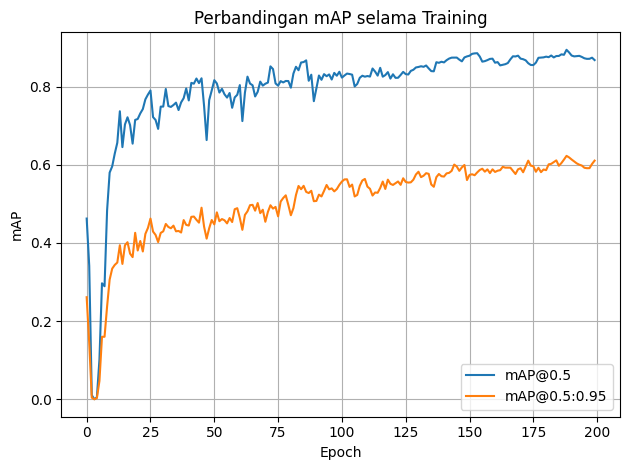

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Baca file hasil training
results_base = "results2" # result1 results2
variation_base = "medium" # nano small medium
df = pd.read_csv(f"{results_base}/training/{variation_base}-training/results.csv")

# Buat plot
plt.plot(df.index, df["metrics/mAP50(B)"], label="mAP@0.5")
plt.plot(df.index, df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95")

plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("Perbandingan mAP selama Training")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()